# Template Matching

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

In [2]:
img = cv2.imread(r"E:\Course\Python for Computer Vision with OpenCV and Deep Learning\1. Course Overview and Introduction\Computer-Vision-with-Python\DATA\sammy.jpg")

In [3]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

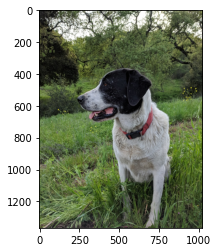

In [4]:
plt.imshow(img)

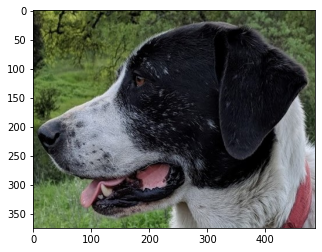

In [5]:
face = cv2.imread(r"E:\Course\Python for Computer Vision with OpenCV and Deep Learning\1. Course Overview and Introduction\Computer-Vision-with-Python\DATA\sammy_face.jpg")
face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
plt.imshow(face)

In [6]:
mysum  = 'sum'

In [7]:
mysum([1,2,3])

TypeError: 'str' object is not callable

In [8]:
mysum= eval(mysum)
mysum

<function sum(iterable, start=0, /)>

In [9]:
mysum([1,2,3])

6

**Using 4 ***


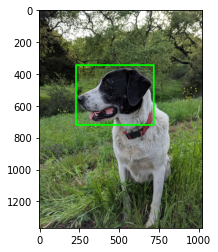

**Using 5 ***


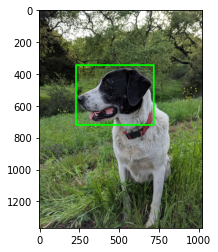

**Using 2 ***


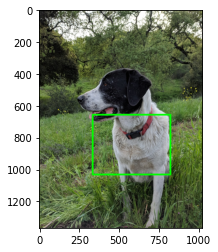

**Using 3 ***


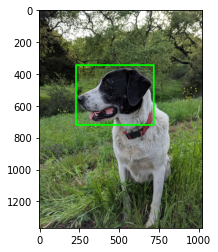

**Using 0 ***


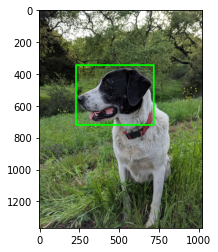

**Using 1 ***


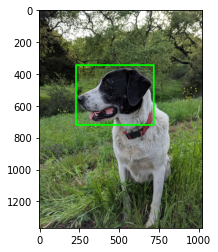

In [10]:
methods = [ 'cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR', 'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']
for m in methods:
    img_copy = img.copy()
    m = eval(m)
    result = cv2.matchTemplate(img_copy, face, m)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
    if m in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        pt1 = min_loc
    else:
        pt1 = max_loc
    cv2.rectangle(img_copy, pt1, (pt1[0]+face.shape[1],pt1[1]+face.shape[0]), color = (0,255,0), thickness = 10)
    plt.imshow(img_copy)
    print('**Using %s ***'%m)
    plt.show()

# Corner Detection using Harris and Shi-Tomasi Corner Detector

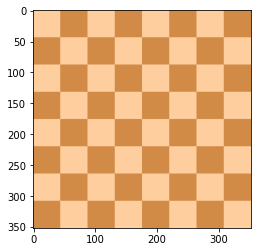

In [30]:
chess = cv2.imread(r"E:\Course\Python for Computer Vision with OpenCV and Deep Learning\1. Course Overview and Introduction\Computer-Vision-with-Python\DATA\flat_chessboard.png")
chess = cv2.cvtColor(chess, cv2.COLOR_BGR2RGB)
plt.imshow(chess)

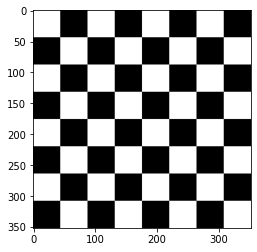

In [31]:
gray_chess = cv2.cvtColor(chess, cv2.COLOR_RGB2GRAY)
plt.imshow(gray_chess, cmap = 'gray')

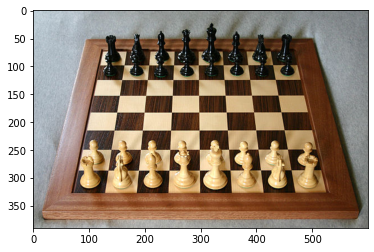

In [50]:
real_chess = cv2.imread(r"E:\Course\Python for Computer Vision with OpenCV and Deep Learning\1. Course Overview and Introduction\Computer-Vision-with-Python\DATA\real_chessboard.jpg")
real_chess = cv2.cvtColor(real_chess, cv2.COLOR_BGR2RGB)
plt.imshow(real_chess)

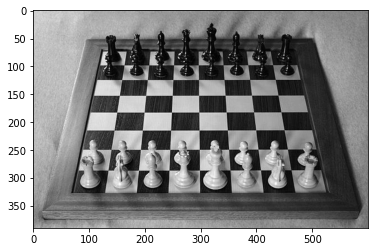

In [51]:
gray_real_chess = cv2.imread(r"E:\Course\Python for Computer Vision with OpenCV and Deep Learning\1. Course Overview and Introduction\Computer-Vision-with-Python\DATA\real_chessboard.jpg")
gray_real_chess = cv2.cvtColor(gray_real_chess, cv2.COLOR_RGB2GRAY)
plt.imshow(gray_real_chess, cmap = 'gray')

# In order for Corner Detection Algo to work we need to convert the image into float32

In [20]:
gray_chess = np.float32(gray_chess)
gray_chess

array([[215., 215., 215., ..., 152., 152., 152.],
       [215., 215., 215., ..., 152., 152., 152.],
       [215., 215., 215., ..., 152., 152., 152.],
       ...,
       [152., 152., 152., ..., 215., 215., 215.],
       [152., 152., 152., ..., 215., 215., 215.],
       [152., 152., 152., ..., 215., 215., 215.]], dtype=float32)

In [24]:
dst = cv2.cornerHarris(src = gray_chess, blockSize = 2, ksize = 3, k=0.04)
dst = cv2.dilate(dst, None)
chess[dst>0.01*dst.max()] = [0,0,0] #black

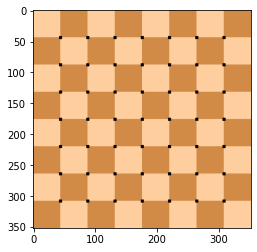

In [25]:
plt.imshow(chess)

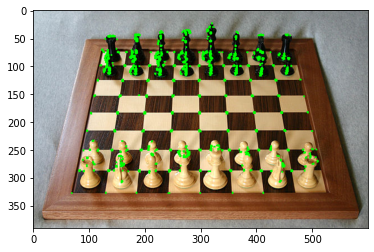

In [29]:
dst = cv2.cornerHarris(src = gray_real_chess, blockSize = 2, ksize = 3, k=0.04)
dst = cv2.dilate(dst, None)
real_chess[dst>0.01*dst.max()] = [0,255,0] #black
plt.imshow(real_chess)

In [43]:
corner = cv2.goodFeaturesToTrack(image = gray_chess, maxCorners = 100, qualityLevel = 0.01, minDistance = 10 )

# In order for the Shi-Tomashi corner detector to work we need to convert it to int0

In [47]:
corner = np.int0(corner)

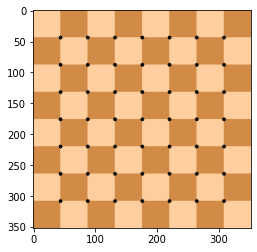

In [48]:
for i in corner:
    x,y = i.ravel()
    cv2.circle(chess, center = (x,y), radius = 3, color = (0,0,0), thickness = -1)
    plt.imshow(chess)

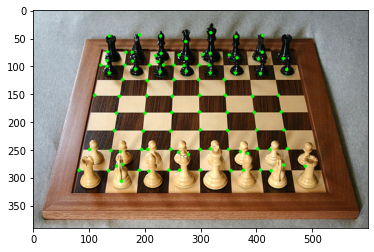

In [55]:
corner = cv2.goodFeaturesToTrack(image = gray_real_chess, maxCorners = 100, qualityLevel = 0.01, minDistance = 10 )
corner = np.int0(corner)
for i in corner:
    x,y = i.ravel()
    cv2.circle(real_chess, center = (x,y), radius = 3, color = (0,255,0), thickness = -1)
    plt.imshow(real_chess)